# Example of workflow
Here, we reproduce some results obtained in [This article](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004571). We start from the .zginml model that can be downloaded [here](https://doi.org/10.1371/journal.pcbi.1004571.s017) (SuppMat_models/SuppMat_Model_Master_Model.zginml)

In [1]:
import maboss
import ginsim
import pypint

You are using Pint version 2017-09-25 and pypint 1.3.1

API is documented at https://loicpauleve.name/pint/doc/api.html

### Loading the model in the api
Go to MaBoSS -> load network (zginml format). And replace the argument of the first function by the loaction of you .zginml file.

In [2]:
m = ginsim.open("/model/Master_Model.zginml")
ginsim.service("maboss").export(m, "mybndfile.bnd")
master_simulation = maboss.load_file("mybndfile.bnd")

### Setting the simulation parameters
#### Setting initial states
To quickly modify the initial states of several nodes, you can use the widgets `wg_set_istate`. Go to MaBoSS -> network -> set istate.

In [3]:
maboss.wg_set_istate(master_simulation.network)

SelectMultiple(description='Nodes', options=('ECMicroenv', 'DNAdamage', 'GF', 'TGFbeta', 'Metastasis', 'Migration', 'Invasion', 'EMT', 'Apoptosis', 'CellCycleArrest', 'p21', 'CDH1', 'CDH2', 'VIM', 'TWIST1', 'SNAI1', 'SNAI2', 'ZEB1', 'ZEB2', 'AKT1', 'DKK1', 'CTNNB1', 'NICD', 'p63', 'p53', 'p73', 'miR200', 'miR203', 'miR34', 'AKT2', 'ERK', 'SMAD'), value=())

Text(value='', description='istate')

Button(description='Ok', style=ButtonStyle())

<IPython.core.display.Javascript object>

Run cell below to validate,(you may have to change the network variable)


In [4]:
nodes = ('Metastasis', 'Migration', 'Invasion', 'EMT', 'Apoptosis', 'CellCycleArrest', 'p21', 'CDH1', 'CDH2', 'VIM', 'TWIST1', 'SNAI1', 'SNAI2', 'ZEB1', 'ZEB2', 'AKT1', 'DKK1', 'CTNNB1', 'NICD', 'p63', 'p53', 'p73', 'AKT2', 'ERK', 'SMAD')
istate = [1, 0]
for nd in nodes:
    master_simulation.network.set_istate(nd, istate)

In [5]:
maboss.wg_set_istate(master_simulation.network)

SelectMultiple(description='Nodes', options=('ECMicroenv', 'DNAdamage', 'GF', 'TGFbeta', 'Metastasis', 'Migration', 'Invasion', 'EMT', 'Apoptosis', 'CellCycleArrest', 'p21', 'CDH1', 'CDH2', 'VIM', 'TWIST1', 'SNAI1', 'SNAI2', 'ZEB1', 'ZEB2', 'AKT1', 'DKK1', 'CTNNB1', 'NICD', 'p63', 'p53', 'p73', 'miR200', 'miR203', 'miR34', 'AKT2', 'ERK', 'SMAD'), value=())

Text(value='', description='istate')

Button(description='Ok', style=ButtonStyle())

<IPython.core.display.Javascript object>

Run cell below to validate,(you may have to change the network variable)


In [6]:
nodes = ('ECMicroenv', 'DNAdamage', 'GF', 'TGFbeta')
istate = [0.5, 0.5]
for nd in nodes:
    master_simulation.network.set_istate(nd, istate)

In [7]:
maboss.wg_set_istate(master_simulation.network)

SelectMultiple(description='Nodes', options=('ECMicroenv', 'DNAdamage', 'GF', 'TGFbeta', 'Metastasis', 'Migration', 'Invasion', 'EMT', 'Apoptosis', 'CellCycleArrest', 'p21', 'CDH1', 'CDH2', 'VIM', 'TWIST1', 'SNAI1', 'SNAI2', 'ZEB1', 'ZEB2', 'AKT1', 'DKK1', 'CTNNB1', 'NICD', 'p63', 'p53', 'p73', 'miR200', 'miR203', 'miR34', 'AKT2', 'ERK', 'SMAD'), value=())

Text(value='', description='istate')

Button(description='Ok', style=ButtonStyle())

<IPython.core.display.Javascript object>

Run cell below to validate,(you may have to change the network variable)


In [8]:
nodes = ('miR200', 'miR203', 'miR34')
istate = [0, 1]
for nd in nodes:
    master_simulation.network.set_istate(nd, istate)

#### Setting output
You can use the widget `wg_set_output` to set the output of the simulation (MaBoSS -> Simulation -> Set output).

In [9]:
maboss.wg_set_output(master_simulation)

SelectMultiple(description='Output', options=('ECMicroenv', 'DNAdamage', 'GF', 'TGFbeta', 'Metastasis', 'Migration', 'Invasion', 'EMT', 'Apoptosis', 'CellCycleArrest', 'p21', 'CDH1', 'CDH2', 'VIM', 'TWIST1', 'SNAI1', 'SNAI2', 'ZEB1', 'ZEB2', 'AKT1', 'DKK1', 'CTNNB1', 'NICD', 'p63', 'p53', 'p73', 'miR200', 'miR203', 'miR34', 'AKT2', 'ERK', 'SMAD'), value=())

Button(description='Ok', style=ButtonStyle())

<IPython.core.display.Javascript object>

Run cell below to validate, (you may have to change the network variable)


In [10]:
master_simulation.network.set_output(('Metastasis', 'Migration', 'Invasion', 'EMT', 'Apoptosis', 'CellCycleArrest'))

#### Setting other parameters
To modify other parameters of the simulation, you can use the method `update_parameters` of the simulation object.

In [11]:
master_simulation.update_parameters(discrete_time=0, use_physrandgen=0,
                                    seed_pseudorandom=100, sample_count=50000,
                                    max_time=50, time_tick=0.1, thread_count=4,
                                    statdist_traj_count=100, statdist_cluster_threshold=0.9)

## Runing simulation
Runing the simulation will create a `Result` object that holds the results of the simulation. You can quickly write the line below by going to MaBoSS -> Simulation -> run

In [12]:
master_results = master_simulation.run()

MaBoSS ended successfuly


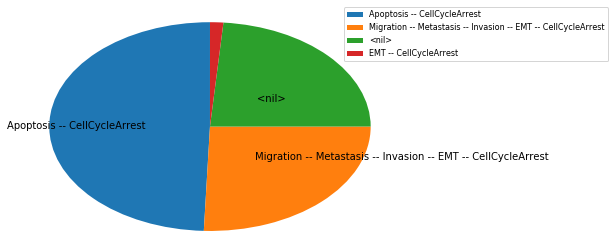

In [13]:
fig = master_results.plot_piechart()
fig